In [5]:

## REFERENCE https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_control_system_advanced.html
## https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")



## universe of each state

In [6]:
# GIVEN AS PER QUESTION
min_val = 0; max_val = 10; step_dist = 0.5;
min_angle = 0; max_angle = 90; step_angle = 1;
min_speed = 0; max_speed = 5; step_speed = 0.2;
min_turn = 0; max_turn = 90; step_turn = 1;

### Membership functions of inputs and outputs

In [8]:
# 2 Input Antecedent
Ip_1_dist = ctrl.Antecedent(np.arange(min_val, max_val+step_dist, step_dist), 'distance_from_obs')
Ip_1_dist['Near'] = fuzz.trimf(Ip_1_dist.universe, [0,0,3.5])
Ip_1_dist['Far'] = fuzz.trimf(Ip_1_dist.universe, [1.5,5,8.5])
Ip_1_dist['V_Far'] = fuzz.trimf(Ip_1_dist.universe, [6.5,10,10])

Ip_2_angle = ctrl.Antecedent(np.arange(min_angle, max_angle+step_angle, step_angle), 'angle_from_obs')
Ip_2_angle['Small'] = fuzz.trimf(Ip_2_angle.universe,[0,0,30])
Ip_2_angle['Med'] = fuzz.trimf(Ip_2_angle.universe, [10,45,80])
Ip_2_angle['Large'] = fuzz.trimf(Ip_2_angle.universe, [60,90,90])

# 2 Output objects 
op_1_speed = ctrl.Consequent(np.arange(min_speed, max_speed+step_speed, step_speed), 'speed')
op_1_speed['Slow_Spd'] = fuzz.trimf(op_1_speed.universe, [0,0,1.4])
op_1_speed['Med_Spd'] = fuzz.trimf(op_1_speed.universe, [0.4,1.8,3])
op_1_speed['Fast_Spd'] = fuzz.trimf(op_1_speed.universe, [2,3.4,4.6])
op_1_speed['Max_Spd'] = fuzz.trimf(op_1_speed.universe, [3.4,5,5])

op_2_st_turn = ctrl.Consequent(np.arange(min_turn, max_turn+step_turn, step_turn), 'st_turn')
op_2_st_turn['Mild_ST'] = fuzz.trimf(op_2_st_turn.universe, [0,20,45])
op_2_st_turn['Sharp_ST'] = fuzz.trimf(op_2_st_turn.universe, [25,45,80])
op_2_st_turn['Very_ST'] = fuzz.trimf(op_2_st_turn.universe, [60,90,90])

**EXPLAINATION for MEMBERSHIP FUNCTION**

**Triangular** membership function is chosen here because, for this particuar function as low, medium, high ME are the ways the values will be split and also it is less complex, when compared to other membership functions.


To get the correct member ship values, I have used matlab **fuzzyLogicDesigner**. Created 2 antecedent and 2 outputs as per requirements, After feeding the fuzzy rules by monitoring the behaviour of the output, I changed the member ship functions to get the correct output

### RULES USED FOR INTERFERENCING

In [9]:
rule1 = ctrl.Rule(Ip_1_dist['Near'] & Ip_2_angle['Small'],(op_1_speed['Slow_Spd'],op_2_st_turn['Very_ST']))
rule2 = ctrl.Rule(Ip_1_dist['Near'] & Ip_2_angle['Med'],(op_1_speed['Slow_Spd'],op_2_st_turn['Sharp_ST']))
rule3 = ctrl.Rule(Ip_1_dist['Near'] & Ip_2_angle['Large'], (op_1_speed['Slow_Spd'],op_2_st_turn['Sharp_ST']))
rule4 = ctrl.Rule(Ip_1_dist['Far'] & Ip_2_angle['Small'], (op_1_speed['Med_Spd'],op_2_st_turn['Sharp_ST']))
rule5 = ctrl.Rule(Ip_1_dist['Far'] & Ip_2_angle['Med'], (op_1_speed['Med_Spd'],op_2_st_turn['Sharp_ST']))
rule6 = ctrl.Rule(Ip_1_dist['Far'] & Ip_2_angle['Large'], (op_1_speed['Fast_Spd'],op_2_st_turn['Mild_ST']))
rule7 = ctrl.Rule(Ip_1_dist['V_Far'] & Ip_2_angle['Small'], (op_1_speed['Fast_Spd'],op_2_st_turn['Mild_ST']))
rule8 = ctrl.Rule(Ip_1_dist['V_Far'] & Ip_2_angle['Med'], (op_1_speed['Max_Spd'],op_2_st_turn['Mild_ST']))
rule9 = ctrl.Rule(Ip_1_dist['V_Far'] & Ip_2_angle['Large'], (op_1_speed['Max_Spd'],op_2_st_turn['Mild_ST']))

In [10]:
sys_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5 ,rule6, rule7, rule8, rule9])

In [11]:
simulation=ctrl.ControlSystemSimulation(sys_ctrl)

### PLOTTING Input/Output States before simulation

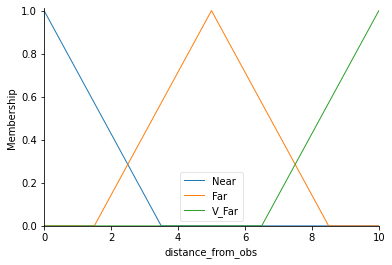

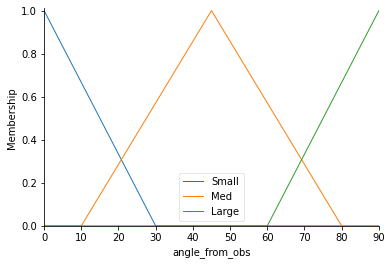

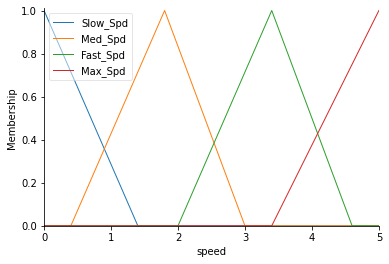

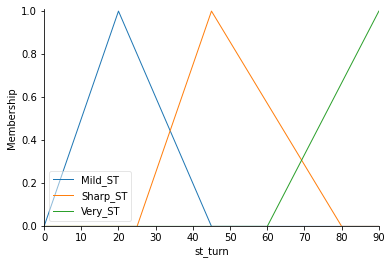

In [14]:
Ip_1_dist.view()
Ip_2_angle.view()
op_1_speed.view()
op_2_st_turn.view()

### Computing for  1 input after simulation

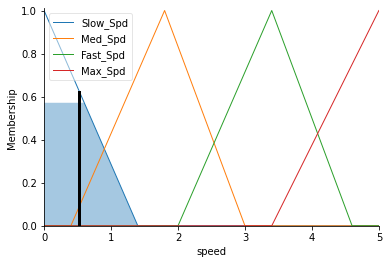

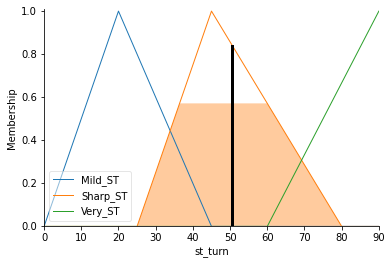

In [49]:
simulation.input['distance_from_obs'] = 1.5
simulation.input['angle_from_obs'] = 30

simulation.compute()

op_1_speed.view(sim=simulation)
op_2_st_turn.view(sim=simulation)

Defuzzification used is **Centroid** and the crisp value obtained is 0.65 for speed and 0.9 for steering turn

**CONCLUSION FROM THE GENERATED GRAPH USING MATLAB**

From the plot it is seen that that the input mentioned was Distance=1.5 and Angle=30 and as per the membership function defined this falls under distance is near and angle is medium, hence the resultant ouput speed is 0.513 and steering_turn is 50.6 falls under the slow speed and sharp turn respectively

### COMPARING FOR DIFFERENT INPUT

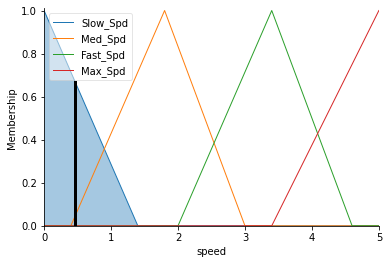

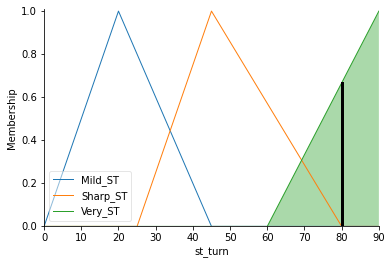

In [48]:
simulation.input['distance_from_obs'] = 0
simulation.input['angle_from_obs'] = 0

simulation.compute()


op_1_speed.view(sim=simulation)
op_2_st_turn.view(sim=simulation)

Defuzzification used is **Centroid** and the crisp value obtained is 0.7 for speed and steering turn

**CONCLUSION FROM THE GENERATED GRAPH USING MATLAB**

From the plot it is seen that that the input mentioned was Distance=0 and Angle=0 and as per the membership function defined this falls under distance is near and angle is small, hence the resultant ouput speed is 0.45 and steering_turn is 80.3 which falls under the slow speed and very sharp turn respectively


### CHOICE OF INFERENCE AND DEFUZZIFICATION

1) Sugeno membership function is commonly used when output membership function is not present. In this problem, I have mentioned the membership function for the two outputs, hence have used mamdani as the inference system mamdani is also used to obtain a crisp value by defuzzification whereas sugeno calculates the output as weighted average.In terms of error criteria comparisons, "mamdani" performs better than "Sugeno". overall, "mamdani" is best, due to its advantages of being intutive, having wide acceptance rate and it's well-suitedness to human input.

2) Fuzzy output being converted into a single crisp value is known as defuzzification. Centroid defuzzification is chosen as it returns the center of gravity of the fuzzy set along the x-axis. This defuzzification is commonly used as it provides better repeatibility of the crisp value and more robust as the center of gravity of the entire fuzzy set is considered. 
